In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('mbti.csv')
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [3]:
# Data cleaning,replace the ||| with space
data['posts'] = data['posts'].str.replace('|||', ' ')

C:\Users\Sanjanarao\AppData\Local\Temp\ipykernel_8172\769639010.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['posts'] = data['posts'].str.replace('|||', ' ')


In [4]:
data.head()

,type,posts
0,INFJ,' h t t p : / / w w w . y o u t u b e . c o m...
1,ENTP,' I ' m f i n d i n g t h e l a c k o...
2,INTP,' G o o d o n e _ _ _ _ _ h t t p...
3,INTJ,"' D e a r I N T P , I e n j o y e d..."
4,ENTJ,' Y o u ' r e f i r e d . | | | T h a t ' s...


In [5]:
# pip install matplotlib

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

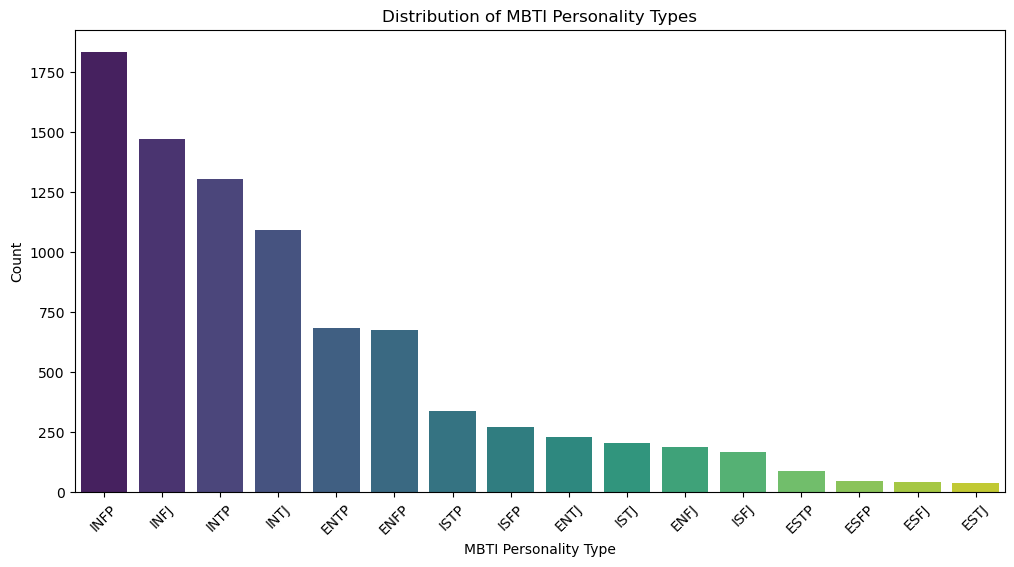

In [7]:
# Plot the distribution of the 16 MBTI types
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='type', order=data['type'].value_counts().index, palette='viridis')
plt.title('Distribution of MBTI Personality Types')
plt.xlabel('MBTI Personality Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Count the occurrences of each MBTI type
mbti_counts = data['type'].value_counts()

In [9]:
# Display the distribution of MBTI types
print("Distribution of MBTI Personality Types:")
print(mbti_counts)

Distribution of MBTI Personality Types:
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


In [10]:
# Define a function to get the four dimensions from the MBTI type
def get_dimensions(mbti_type):
    dimensions = {
        'Introvert-Extrovert': mbti_type[0],
        'Intuition-Sensing': mbti_type[1],
        'Thinking-Feeling': mbti_type[2],
        'Judgment-Perception': mbti_type[3]
    }
    return dimensions
data_dimensions = data['type'].apply(get_dimensions).apply(pd.Series)
data_dimensions

,Introvert-Extrovert,Intuition-Sensing,Thinking-Feeling,Judgment-Perception
0,I,N,F,J
1,E,N,T,P
2,I,N,T,P
3,I,N,T,J
4,E,N,T,J
...,...,...,...,...
8670,I,S,F,P
8671,E,N,F,P
8672,I,N,T,P
8673,I,N,F,P


In [11]:
intro_extro_dist = data_dimensions['Introvert-Extrovert'].value_counts()
intuition_sensing_dist = data_dimensions['Intuition-Sensing'].value_counts()
thinking_feeling_dist = data_dimensions['Thinking-Feeling'].value_counts()
judgment_perception_dist = data_dimensions['Judgment-Perception'].value_counts()

In [12]:
# Display the distributions
print("Distribution of Introvert-Extrovert:")
print(intro_extro_dist)
print("\nDistribution of Intuition-Sensing:")
print(intuition_sensing_dist)
print("\nDistribution of Thinking-Feeling:")
print(thinking_feeling_dist)
print("\nDistribution of Judgment-Perception:")
print(judgment_perception_dist)

Distribution of Introvert-Extrovert:
I    6676
E    1999
Name: Introvert-Extrovert, dtype: int64

Distribution of Intuition-Sensing:
N    7478
S    1197
Name: Intuition-Sensing, dtype: int64

Distribution of Thinking-Feeling:
F    4694
T    3981
Name: Thinking-Feeling, dtype: int64

Distribution of Judgment-Perception:
P    5241
J    3434
Name: Judgment-Perception, dtype: int64


In [13]:
# data cleaning (remove punctuations,links,stopwards,converting letter and lowercase)
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and punkt for word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
data = pd.read_csv('mbti.csv')

# Define function for preprocessing and tokenization
def preprocess_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing and tokenization to the 'posts' column
data['tokens'] = data['posts'].apply(preprocess_and_tokenize)

# Display the first few rows of the dataset with tokens
print(data[['type', 'tokens']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjanarao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjanarao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   type                                             tokens
0  INFJ  [intj, moments, sportscenter, top, ten, plays,...
1  ENTP  [im, finding, lack, posts, alarmingsex, boring...
2  INTP  [good, one, course, say, know, thats, blessing...
3  INTJ  [dear, intp, enjoyed, conversation, day, esote...
4  ENTJ  [youre, firedthats, another, silly, misconcept...


In [14]:
# tokenization(preprocessing)
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjanarao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
def preprocess_and_tokenize(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [16]:
data['tokens'] = data['posts'].apply(preprocess_and_tokenize)
print(data[['type', 'tokens']])

      type                                             tokens
0     INFJ  ['http, :, //www.youtube.com/watch, ?, v=qsXHc...
1     ENTP  [', I, 'm, finding, lack, posts, alarming.|||S...
2     INTP  ['Good, one, _____, https, :, //www.youtube.co...
3     INTJ  ['Dear, INTP, ,, I, enjoyed, conversation, day...
4     ENTJ  ['You, 're, fired.|||That, 's, another, silly,...
...    ...                                                ...
8670  ISFP  ['https, :, //www.youtube.com/watch, ?, v=t8ed...
8671  ENFP  ['So, ..., thread, already, exists, someplace,...
8672  INTP  ['So, many, questions, things, ., I, would, ta...
8673  INFP  [', I, conflicted, right, comes, wanting, chil...
8674  INFP  ['It, long, since, I, personalitycafe, -, alth...

[8675 rows x 2 columns]


In [17]:
# !pip install gensim

In [18]:
#pip install scipy

In [19]:
#pip install gensim==4.3.2

In [20]:
import scipy
# import gensim
from gensim.models import Word2Vec

In [21]:
# print(gensim.__version__)
# print(scipy.__version__)

In [22]:
data['tokens'] = data['posts'].apply(preprocess_and_tokenize)

In [23]:
# Train Word2Vec model
model = Word2Vec(data['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [24]:
# example to get for word
word = 'http'
vector = model.wv[word]
print(f'Word: {word}, Vector shape: {vector.shape}, Vector values: {vector}')

Word: http, Vector shape: (100,), Vector values: [ 0.81223166 -2.8063767   2.4659507   2.2173107   2.569528    3.180039
 -0.13562566  1.3079574  -1.0636803  -3.2489622   3.276673   -2.325653
  1.6939197   1.5871919  -1.0903169  -2.6045291   0.5183039  -1.589177
 -0.7088624  -0.5810177   1.2160071   1.9667113   1.4602407  -1.4034868
  1.0208579   1.0074036   2.3514473  -2.940814    5.6697736   1.976109
 -5.1887574   3.5913131   1.2115195  -2.2490368   0.14322549  2.732242
 -1.245056    2.9399633  -1.9615564  -2.1463525  -1.7760211  -2.8081126
 -0.39266396 -2.39347    -0.19843434  2.303235   -3.728464   -3.146726
  5.2013836   2.2243598  -1.141413   -0.5016015   0.9930832   0.38243687
  1.5445659   0.19625716 -3.240054    1.7191635  -3.7947688   0.25155637
 -1.3045652  -7.9196043  -1.8378686   2.5894122  -2.5519469  -2.2319787
  3.467528    1.9064388  -4.631513    5.4161944   5.301582    0.12783723
  2.2662861  -0.4122461   0.6193578   0.7412797   2.466781    1.4951437
  0.5329161   0.92

In [25]:
# Train CBOW model
cbow_model = Word2Vec(data['tokens'], vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Train Skip-gram model
skipgram_model = Word2Vec(data['tokens'], vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [26]:
word = 'http'
cbow_vector = cbow_model.wv[word]
print(f'CBOW - Word: {word}, Vector shape: {cbow_vector.shape}, Vector values: {cbow_vector}')

CBOW - Word: http, Vector shape: (100,), Vector values: [-0.7307404  -1.7274518   2.9988017   2.685752   -1.0459756   2.5207913
 -3.2291725   1.0806352   0.32698965 -2.3075256   4.1398773  -0.50254375
  2.561344    3.5819383  -1.5061234  -1.7755467  -1.1961453  -1.6029422
  0.0135489   0.17239673  0.66126865 -2.6946943   1.5776297  -5.1477613
  1.1833655  -1.0804805  -0.03109553 -2.1794705   6.0070395   2.9438546
 -4.886774    1.3179209   3.0743103  -1.2458106  -2.1643374   3.9994767
 -1.2324322   1.9990608  -1.6090881  -1.017104   -2.230539   -4.2656655
 -3.0403636  -4.174294    1.839757   -0.36353162 -3.0814152  -0.6586047
  5.476131    1.5402049  -1.9504105  -0.05391538 -2.3643327   0.76364106
  1.1249887   0.31847447 -3.3520386   2.469485   -3.4030197   1.633078
 -1.0296825  -3.803356   -2.7983496   1.0024325  -2.596977   -3.6777768
  2.0198677   1.1723187  -4.831192    3.357914    5.979727    2.5574298
 -0.521955   -0.54081     1.3566399  -1.1519289   1.9807136   1.4892731
 -0.039

In [27]:
skipgram_vector = skipgram_model.wv[word]
print(f'Skip-gram - Word: {word}, Vector shape: {skipgram_vector.shape}, Vector values: {skipgram_vector}')

Skip-gram - Word: http, Vector shape: (100,), Vector values: [-0.02511252 -0.36104742 -0.24722433  0.0580814   0.9902346   0.01401452
  0.2779613  -0.41067517  0.918947   -0.21309605  0.7642986  -0.27061844
 -0.27359918  1.8475534  -0.2806362  -1.0498272  -0.99488264 -1.604629
  0.692978   -0.31303978  0.25736544  0.125926    0.3768605  -0.88883245
 -0.6552172   0.02930578  0.16730115 -1.7165828   1.0185727   0.95598805
 -0.6438027   1.0286195   0.5291732  -0.36378896 -0.58811986  0.65002716
 -1.2906239   0.42780617 -0.31870383 -0.8587349   0.42260674  0.08665716
  0.32798928 -0.11651505  1.1531913   0.51232123 -1.0221     -0.6345196
  0.6157332   0.5045243   1.1159736   0.38560468  1.2444636  -0.24688134
  0.19032556  0.09644996 -0.07978077 -0.2750724  -0.59209627 -0.70494455
 -0.01108897 -1.5246199  -0.5380785   0.25387374 -1.418906   -0.02089926
  0.76358616  2.310431   -1.1932869   1.7077998  -0.19379425 -0.8040338
  0.6351394  -0.20134294  0.4121462   0.2290396  -0.5931519   0.570

In [28]:
cbow_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Build vocabulary
cbow_model.build_vocab(data['tokens'])

# Train the CBOW model with 50 epochs
cbow_model.train(data['tokens'], total_examples=cbow_model.corpus_count, epochs=50)

# Example: Get vector for a word using CBOW
word = 'http'
cbow_vector = cbow_model.wv[word]
print(f'CBOW - Word: {word}, Vector shape: {cbow_vector.shape}, Vector values: {cbow_vector[:10]}')  # showing first 10 values for brevity

CBOW - Word: http, Vector shape: (100,), Vector values: [ 7.2593217   0.51949847  3.760573   -0.97891164  1.6113898   2.6620228
  6.238255    6.238791    5.985426   -1.8955036 ]


In [29]:
# test-train
from sklearn.model_selection import train_test_split

In [30]:
train_data,test_data= train_test_split(data['tokens'],test_size=0.3, random_state=42)

In [31]:
print(f'Training Data Size: {len(train_data)}')
print(f'Testing Data Size: {len(test_data)}')

Training Data Size: 6072
Testing Data Size: 2603


In [32]:
# import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define function for preprocessing and tokenization
def preprocess_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)  # Join tokens to form a processed string

# Apply preprocessing and tokenization to the 'posts' column
data['processed_posts'] = data['posts'].apply(preprocess_and_tokenize)

# Split the data into training and testing sets with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(data['processed_posts'], data['type'], test_size=0.3, random_state=42)

# Transform the text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.6219746446407991
Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.60      0.11      0.18        56
        ENFP       0.66      0.49      0.56       196
        ENTJ       0.79      0.26      0.39        58
        ENTP       0.66      0.49      0.56       201
        ESFJ       0.00      0.00      0.00        10
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00        17
        ESTP       1.00      0.04      0.08        25
        INFJ       0.64      0.71      0.67       434
        INFP       0.60      0.86      0.71       566
        INTJ       0.63      0.66      0.64       311
        INTP       0.60      0.80      0.68       404
        ISFJ       0.92      0.18      0.30        61
        ISFP       0.58      0.18      0.27        84
        ISTJ       0.62      0.14      0.23        70
        ISTP       0.77      0.40      0.52       101

    accuracy                

C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [33]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assume X_train_tfidf, X_test_tfidf, y_train, and y_test are already defined and processed
X_train, X_test, y_train, y_test = train_test_split(data['processed_posts'], data['type'], test_size=0.3, random_state=42)
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_tfidf, y_train)

vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.6219746446407991
Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.60      0.11      0.18        56
        ENFP       0.66      0.49      0.56       196
        ENTJ       0.79      0.26      0.39        58
        ENTP       0.66      0.49      0.56       201
        ESFJ       0.00      0.00      0.00        10
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00        17
        ESTP       1.00      0.04      0.08        25
        INFJ       0.64      0.71      0.67       434
        INFP       0.60      0.86      0.71       566
        INTJ       0.63      0.66      0.64       311
        INTP       0.60      0.80      0.68       404
        ISFJ       0.92      0.18      0.30        61
        ISFP       0.58      0.18      0.27        84
        ISTJ       0.62      0.14      0.23        70
        ISTP       0.77      0.40      0.52       101

    accuracy                

C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [34]:
# linear support vector
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

model= LinearSVC(max_iter=1000)
model.fit(X_train_tfidf, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.6054552439492893
Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.67      0.32      0.43        56
        ENFP       0.59      0.55      0.57       196
        ENTJ       0.61      0.43      0.51        58
        ENTP       0.57      0.54      0.56       201
        ESFJ       1.00      0.10      0.18        10
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00        17
        ESTP       0.80      0.32      0.46        25
        INFJ       0.58      0.63      0.60       434
        INFP       0.64      0.76      0.69       566
        INTJ       0.58      0.61      0.59       311
        INTP       0.61      0.72      0.66       404
        ISFJ       0.78      0.41      0.54        61
        ISFP       0.56      0.33      0.42        84
        ISTJ       0.62      0.26      0.36        70
        ISTP       0.63      0.53      0.58       101

    accuracy                

C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [35]:
# stochastic gradient descent
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assume X_train_tfidf, X_test_tfidf, y_train, and y_test are already defined and processed

# Train a Stochastic Gradient Descent classifier
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_test_pred = sgd_model.predict(X_test_tfidf)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_report)


Test Accuracy: 0.6254321936227429
Test Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.59      0.30      0.40        56
        ENFP       0.61      0.58      0.60       196
        ENTJ       0.52      0.47      0.49        58
        ENTP       0.59      0.56      0.58       201
        ESFJ       0.33      0.20      0.25        10
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.67      0.12      0.20        17
        ESTP       0.62      0.40      0.49        25
        INFJ       0.63      0.65      0.64       434
        INFP       0.67      0.77      0.72       566
        INTJ       0.60      0.61      0.61       311
        INTP       0.63      0.73      0.68       404
        ISFJ       0.78      0.46      0.58        61
        ISFP       0.52      0.38      0.44        84
        ISTJ       0.68      0.30      0.42        70
        ISTP       0.59      0.57      0.58       101

    accuracy      

C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [36]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assume X_train_tfidf, X_test_tfidf, y_train, and y_test are already defined and processed

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_report)


Test Accuracy: 0.5386092969650403
Test Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        56
        ENFP       0.70      0.35      0.47       196
        ENTJ       1.00      0.09      0.16        58
        ENTP       0.68      0.38      0.49       201
        ESFJ       0.00      0.00      0.00        10
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00        17
        ESTP       0.00      0.00      0.00        25
        INFJ       0.54      0.68      0.60       434
        INFP       0.46      0.86      0.60       566
        INTJ       0.60      0.54      0.57       311
        INTP       0.59      0.69      0.64       404
        ISFJ       0.00      0.00      0.00        61
        ISFP       0.67      0.02      0.05        84
        ISTJ       1.00      0.01      0.03        70
        ISTP       0.86      0.19      0.31       101

    accuracy      

C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjanarao\anaconda\envs\1c-miniproject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [37]:
# pip install xgboost

In [38]:
# from sklearn.preprocessing import LabelEncoder
# from xgboost import XGBClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Assuming X_train_tfidf, X_test_tfidf, y_train, and y_test are already defined and processed

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Encode the target variable y_train and y_test
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Train an XGBoost classifier
# xgb_model = XGBClassifier( eval_metric='mlogloss', random_state=42)
# xgb_model.fit(X_train_tfidf, y_train_encoded)

# # Make predictions on the test set
# y_test_pred = xgb_model.predict(X_test_tfidf)

# # Evaluate the model on the test set
# test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
# test_report = classification_report(y_test_encoded, y_test_pred)

# print(f'Test Accuracy: {test_accuracy}')
# print('Test Classification Report:')
# print(test_report)


In [39]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with 'processed_posts' and 'type' columns

# Split the data into training and testing sets with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(data['processed_posts'], data['type'], test_size=0.3, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Transform the text data into TF-IDF features with reduced max_features
vectorizer = TfidfVectorizer(max_features=2000)  # Reduced max_features to 2000
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train an XGBoost classifier with optimized parameters
xgb_model = XGBClassifier(
    n_estimators=100,         # Reduce the number of trees
    max_depth=6,              # Reduce the depth of each tree
    learning_rate=0.1,        # Increase the learning rate
    subsample=0.8,            # Use 80% of data for growing each tree
    colsample_bytree=0.8,     # Use 80% of features for growing each tree
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1                 # Utilize all available CPU cores
)
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_test_pred = xgb_model.predict(X_test_tfidf)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
test_report = classification_report(y_test_encoded, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_report)


Test Accuracy: 0.6454091432961967
Test Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.16      0.25        56
           1       0.62      0.60      0.61       196
           2       0.56      0.34      0.43        58
           3       0.65      0.57      0.61       201
           4       1.00      0.10      0.18        10
           5       0.00      0.00      0.00         9
           6       1.00      0.12      0.21        17
           7       0.73      0.32      0.44        25
           8       0.63      0.71      0.67       434
           9       0.64      0.79      0.70       566
          10       0.63      0.68      0.66       311
          11       0.66      0.76      0.71       404
          12       0.93      0.43      0.58        61
          13       0.57      0.37      0.45        84
          14       0.78      0.30      0.43        70
          15       0.79      0.57      0.67       101

    accuracy      

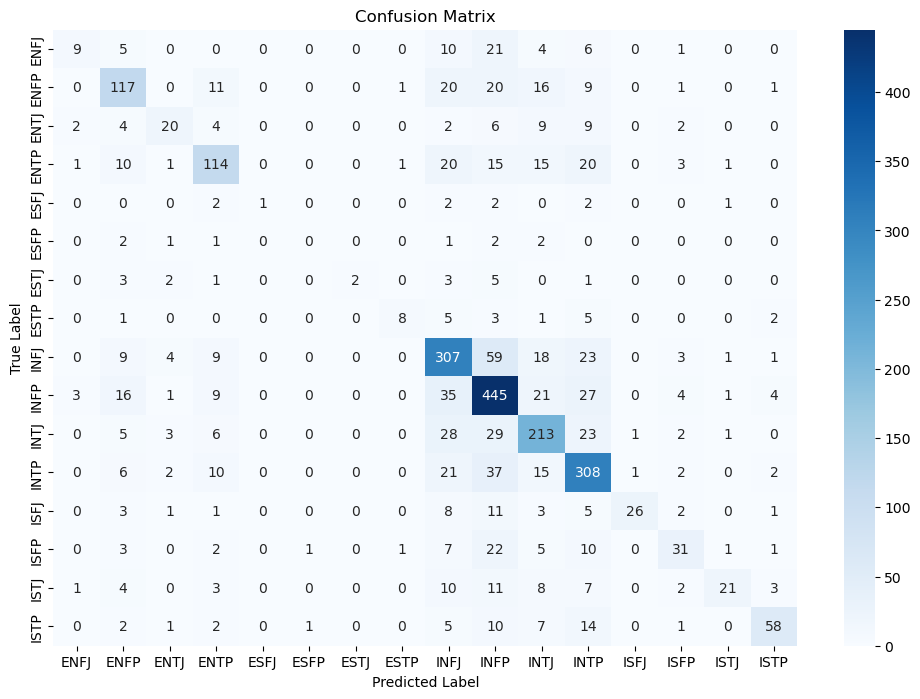

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform(range(16)), yticklabels=label_encoder.inverse_transform(range(16)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [54]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Initialize dictionary to store model accuracies
model_accuracies = {}

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, y_train)
y_pred = logistic_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
model_accuracies['Logistic Regression'] = accuracy

# Linear Support Vector
svm_model = LinearSVC(max_iter=1000, dual='auto')
svm_model.fit(X_train_tfidf, y_train)
y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
model_accuracies['Linear SVM'] = accuracy

# Stochastic Gradient Descent
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_tfidf, y_train)
y_pred = sgd_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
model_accuracies['SGD Classifier'] = accuracy

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred = rf_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
model_accuracies['Random Forest'] = accuracy

# XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train_encoded)
y_pred = xgb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test_encoded, y_pred)
model_accuracies['XGBoost'] = accuracy

# Convert model accuracies to DataFrame for better visualization
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
print(accuracy_df)


                 Model  Accuracy
0  Logistic Regression  0.621206
1           Linear SVM  0.590088
2       SGD Classifier  0.623127
3        Random Forest  0.560507
4              XGBoost  0.640415


In [58]:
from sklearn.metrics import f1_score

# Make sure to replace `y_test_encoded` and `y_test_pred` with the appropriate variable names if they are different
f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')
print(f'XGBoost Classifier F1 Score: {f1}')


XGBoost Classifier F1 Score: 0.6320559160035519
